In [1]:
import yfinance as yf 
import datetime 
import pandas as pd 
import numpy as np 
from scipy import stats
pd.core.common.is_list_like = pd.api.types.is_list_like #
import pandas_datareader as pdr 
yf.pdr_override()
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2017, 1, 1) 
end = datetime.datetime(2018, 1, 1)

In [3]:
def get_tickers():
    f = open('Stocks.txt')
    tickers = []
    for line in f:
        tickers.append(line[0:len(line)-1])
    f.close()
    return tickers

def data_for_ticker(ticker):
    return yf.download([ticker], start=start, end=end)

In [4]:
def generate_frames():
    f = open('Stocks.txt')
    frames = dict()
    for line in f:
        ticker = line[0:len(line)-1]
        frames[ticker] = data_for_ticker(ticker)
    f.close()
    return frames

def get_frame(ticker, frames):
    return frames[ticker]

In [5]:
allTickers = get_tickers()
allFrames = generate_frames()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

Exception in thread Thread-47:
Traceback (most recent call last):
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/yfinance/__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/yfinance/__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/yfinance/__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('APC', 'No data found,

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

Exception in thread Thread-422:
Traceback (most recent call last):
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/yfinance/__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/yfinance/__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/yfinance/__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('TMK', 'No data found


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[******************

In [6]:
def compute_return(frames):
    for ticker in frames:
        frame = frames[ticker]
        pt = frame["Adj Close"][1:].values
        pt_1 = frame["Adj Close"][:-1].values
        ret = np.log(pt / pt_1)
        frames[ticker]["Return"] = [np.NaN, *ret]
        
        ######################
        #Ticker = yf.Ticker(ticker)
        #frames[ticker]["Exchange"] = Ticker.info['fullExchangeName']
        
compute_return(allFrames)

In [7]:
def get_return_info(ticker):
    E = np.mean(allFrames[ticker]["Return"])
    sigma = np.std(allFrames[ticker]["Return"])
    return E, sigma

In [8]:
allReturns = []
allRisks = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
    allReturns.append(ret)
    allRisks.append(risk)

In [9]:
import copy


def find_good_actives(risks,returns,count):
    #return -> max
    return_count = count // 3
    ret = copy.deepcopy(returns)
    return_indices = find_max_ret(return_count,ret,[])
    #risk -> min
    risk = copy.deepcopy(risks)
    risk_indices = find_min_risk(count - return_count, risk,[])
    return [allTickers[index] for index in return_indices + risk_indices]

def find_max_ret(count,returns,accum):
    if count != 0:
        max_ret = allReturns.index(max(returns))
        returns.remove(allReturns[max_ret])
        accum.append(max_ret)
        find_max_ret(count - 1, returns, accum)
    return accum
    
def find_min_risk(count,risks,accum):
    if count != 0:
        min_risk = allRisks.index(min(risks))
        risks.remove(allRisks[min_risk])
        accum.append(min_risk)
        find_min_risk(count - 1, risks, accum)
    return accum

In [10]:
def plot_for_tickers(Tickers):
    rets=[]
    risks=[]
    for tick in Tickers:
        ret,risk = get_return_info(tick)
        rets.append(ret)
        risks.append(risk)
    
    plt.figure(figsize=(10,6))
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.plot(risks, rets,"*")
    plt.show()

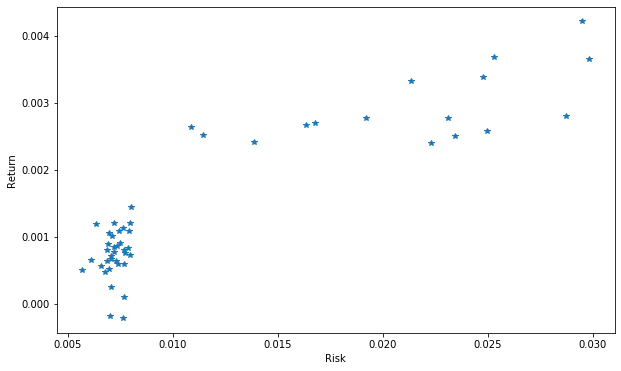

In [11]:
Tickers = find_good_actives(allRisks,allReturns,50)
plot_for_tickers(Tickers)

In [12]:
def covar_coefs(tic1,tic2):
    ret1 = allFrames[tic1]["Return"][1:]
    ret2 = allFrames[tic2]["Return"][1:]
    Rets = np.stack((ret1,ret2))
    Mat = np.cov(Rets)
    return np.cov(Rets)[0][1] #cov btw 1 and 2

In [13]:
from cvxopt import matrix, solvers

def get_optimal_pack(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    
    lambdas=[]
    n = len(Tickers)
    XXX=[]
    for i in range(0,100,5):
        E0 = i / 1000
        print("E0 {}\n\n".format(E0))

        Q = 2*matrix(C)
        G = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            G.append(-1 * E)

        p = matrix([0.0 for i in range(n)])


        G = np.array(G).reshape(-1,1).T
        G = matrix(G)
        h = matrix(-1 * E0)

        A = np.array([1.0 for i in range(n)]).reshape(-1,1).T
        A = matrix(A)
        b = matrix(1.0)

        sol=solvers.qp(Q, p, G, h, A, b)
        
        X = []
        for i in sol['x']:
            X.append(i)

        Es = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            Es.append(E)
        #Доходность портфеля
        Rp = sum([X[i]*Es[i] for i in range(n)])
        #Риск
        sigma2 = []
        for i in range(n):
            for j in range(n):
                sigma2.append(X[i]*X[j]* C[i][j])
        sigma2 = sum(sigma2)

        print(Rp,sigma2**0.5)
        lambdas.append([Rp,sigma2**0.5])
        XXX.append(X)
    return lambdas,XXX

def get_optimal_pack_long_only(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    
    lambdas=[]
    XXX=[]
    n = len(Tickers)
    for i in range(0,43,1):
        E0 = i / 10000
        print("E0 {}\n\n".format(E0))

        Q = 2*matrix(C)
        p = matrix([0.0 for i in range(n)])
        G = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            G.append(-1 * E)

        G = [G] + np.diag([-1.0 for i in range(n)]).tolist()
        G = np.array(G).reshape(n+1,n)
        G = matrix(G)
        h = matrix([-1 * E0] + [0.0 for i in range(n)])

        A = np.array([1.0 for i in range(n)]).reshape(-1,1).T
        A = matrix(A)
        b = matrix(1.0)

        sol=solvers.qp(Q, p, G, h, A, b)
        X = []
        for i in sol['x']:
            X.append(i)

        Es = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            Es.append(E)
        #Доходность портфеля
        Rp = sum([X[i]*Es[i] for i in range(n)])
        #Риск
        sigma2 = []
        for i in range(n):
            for j in range(n):
                sigma2.append(X[i]*X[j]* C[i][j])
        sigma2 = sum(sigma2)

        print(Rp,sigma2**0.5)
        lambdas.append([Rp,sigma2**0.5])
        XXX.append(X)
    return lambdas,XXX

In [14]:
def get_Portfolio(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    X = [0.02 for i in range(50)]
    Es = []
    for ticker in Tickers:
        E,_ = get_return_info(ticker)
        Es.append(E)
    Rp = sum([X[i]*Es[i] for i in range(50)])
    sigma2 = []
    for i in range(50):
        for j in range(50):
            sigma2.append(X[i]*X[j]* C[i][j])
    sigma2 = sum(sigma2)
    Portfolio = [sigma2**0.5,Rp]
    return Portfolio
Portfolio = get_Portfolio(Tickers)

In [15]:
def plot_optimal_pack(lambdas, Portfolio, Tickers):
    rets=[]
    risks=[]
    Xes = [X for [Y,X] in lambdas]
    Yes = [Y for [Y,X] in lambdas]
    for tick in Tickers:
        ret,risk = get_return_info(tick)
        rets.append(ret)
        risks.append(risk)
    

    plt.figure(figsize=(10,6))
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.plot(risks, rets,"*")
    plt.plot(Xes,Yes)
    plt.show()

In [16]:
lambdas,X = get_optimal_pack(Tickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  7.8005e-06 -6.6464e-04  7e-04  2e-16  1e-02
 1:  7.7999e-06  1.0666e-06  7e-06  1e-16  1e-04
 2:  7.7773e-06  7.7052e-06  7e-08  1e-16  5e-06
 3:  7.7720e-06  7.7712e-06  8e-10  2e-16  4e-08
Optimal solution found.
0.000756803652730339 0.002787829929450244
E0 0.005


     pcost       dcost       gap    pres   dres
 0:  8.6659e-06  2.2868e-05  4e-03  1e+00  7e-20
 1:  8.6793e-06  2.2973e-05  4e-05  1e-02  4e-20
 2:  1.0127e-05  3.1371e-05  6e-07  4e-03  4e-20
 3:  1.3264e-04  7.1882e-05  6e-05  4e-16  5e-19
 4:  8.2633e-05  7.9235e-05  3e-06  1e-16  4e-19
 5:  7.9307e-05  7.9274e-05  3e-08  2e-16  3e-19
Optimal solution found.
0.005000985381913397 0.008905432812372866
E0 0.01


     pcost       dcost       gap    pres   dres
 0:  1.2014e-05  7.9409e-05  8e-03  1e+00  9e-20
 1:  1.2152e-05  8.0497e-05  8e-05  2e-02  5e-20
 2:  2.8361e-05  1.5435e-04  2e-06  7e-03  8e-20
 3:  4.0921e-04  3.4448e-04  6e-05  9e-16  5e-18
 4:  3.4

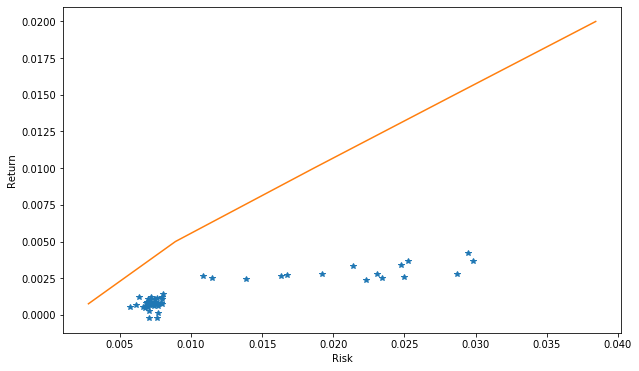

[0.004477029357287914, 0.0014428151412902335]


In [17]:
plot_optimal_pack(lambdas[:5],Portfolio, Tickers)
print(Portfolio)

In [18]:
lambdas_long_only,X2 = get_optimal_pack_long_only(Tickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  2.0000e-05 -1.0015e+00  1e+00  3e-16  7e+00
 1:  1.9998e-05 -1.0025e-02  1e-02  7e-17  7e-02
 2:  1.9836e-05 -1.1040e-04  1e-04  7e-17  9e-04
 3:  1.5473e-05 -4.8827e-06  2e-05  1e-16  1e-04
 4:  1.0817e-05 -1.3262e-06  1e-05  4e-16  7e-20
 5:  1.0063e-05  6.8691e-06  3e-06  2e-16  3e-20
 6:  9.4299e-06  8.9038e-06  5e-07  2e-16  3e-20
 7:  9.2526e-06  9.1994e-06  5e-08  5e-17  3e-20
Optimal solution found.
0.0008393196909711527 0.0030418058854104636
E0 0.0001


     pcost       dcost       gap    pres   dres
 0:  2.0000e-05 -1.0014e+00  1e+00  1e-16  7e+00
 1:  1.9998e-05 -1.0024e-02  1e-02  3e-16  7e-02
 2:  1.9836e-05 -1.1039e-04  1e-04  6e-16  9e-04
 3:  1.5473e-05 -4.8785e-06  2e-05  1e-16  1e-04
 4:  1.0818e-05 -1.3216e-06  1e-05  7e-17  6e-20
 5:  1.0063e-05  6.8705e-06  3e-06  4e-16  4e-20
 6:  9.4298e-06  8.9045e-06  5e-07  1e-16  3e-20
 7:  9.2525e-06  9.1996e-06  5e-08  3e-16  4e-20
Optimal solution found.
0.00083

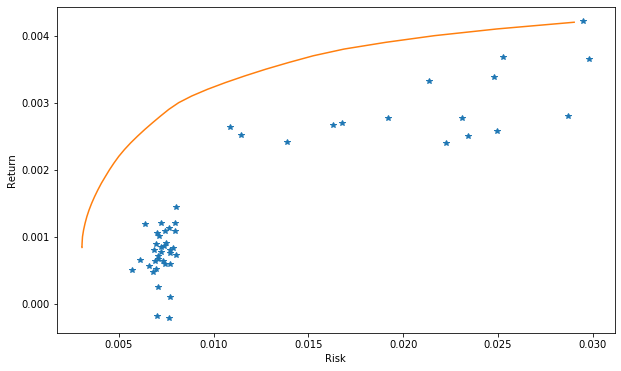

In [19]:
plot_optimal_pack(lambdas_long_only, Portfolio, Tickers)

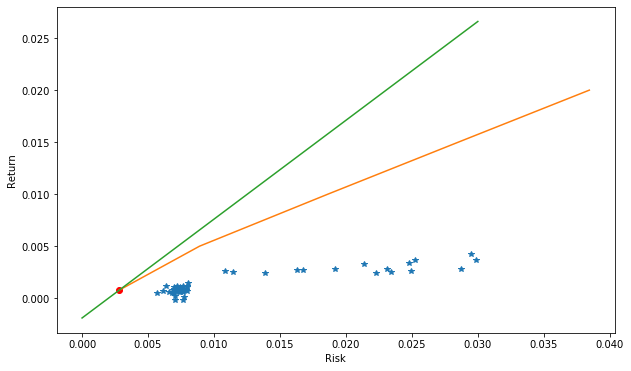

In [53]:
rets=[]
risks=[]
Xes = [X for [Y,X] in lambdas]
Yes = [Y for [Y,X] in lambdas]
for tick in Tickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)


plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes[:5],Yes[:5])
plt.plot([X*0.01 for X in range(0,4)], [X*0.01*0.95 - 0.0019 for X in range(0,4)])
plt.scatter(Xes[0],Yes[0],color='red')
plt.show()

In [21]:
# Returns = [allFrames[tic]["Return"] for tic in Tickers]
# Returns = pd.DataFrame(Returns)
# plt.hist(Returns,bins=40)
# plt.show()

In [22]:
#i - number of ticker
#j - number of day

#https://towardsdatascience.com/learn-to-calculate-your-portfolios-value-at-risk-e1e2c5c68456


def value_portfolio(possib,i,j):
    Value=0
    close = allFrames[Tickers[i]]["Adj Close"].iloc[j]
    Value += close * possib 
    return Value

In [23]:
R = [[value_portfolio(X[0][i],i,j) for i in range(50)] for j in range(1,251)]
Result = []
for row in R:
    Result.append(sum(row))
    
d = {'Diff':Result}
values = pd.DataFrame(d)

values = values.pct_change()
values.sort_values('Diff',inplace=True,ascending=True)
values.quantile(0.05)

43


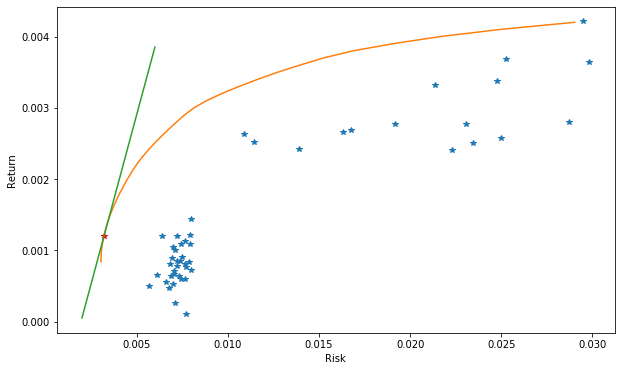

In [228]:
rets=[]
risks=[]
Xes = [X for [Y,X] in lambdas_long_only]
Yes = [Y for [Y,X] in lambdas_long_only]
for tick in Tickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)

plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes,Yes)
plt.plot(Xes[12],Yes[12],"*",color='red')
plt.plot([X*0.001 for X in range(2,7)], [X*0.001*0.95 - 0.00185 for X in range(2,7)])
plt.show()

In [51]:
R = [[value_portfolio(X2[12][i],i,j) for i in range(50)] for j in range(1,251)]
Result = []
for row in R:
    Result.append(sum(row))
    
d = {'Diff':Result}
values = pd.DataFrame(d)

values = values.pct_change()
values.sort_values('Diff',inplace=True,ascending=True)
values.quantile(0.05)

Diff   -0.004001
Name: 0.05, dtype: float64

результат при запрете коротких продаж хуже как и ожидалось

# Task 2

In [79]:
#negative return
Tickers.remove('XOM')
Tickers.remove('PPL')

In [85]:
A = [(get_return_info(tick),tick) for tick in Tickers]
def sort_risk(Tuple):
    return Tuple[0][1]

A.sort(key=sort_risk)
ReallyGoodTickers = [element[1] for element in A][:10]
ReallyGoodTickers

['KO', 'PEP', 'HON', 'ECL', 'PG', 'XEL', 'CMS', 'WM', 'PFE', 'LMT']

In [103]:
A[:10]

[((0.0005053347538775886, 0.005682583767399423), 'KO'),
 ((0.0006551990440823095, 0.006131426838978297), 'PEP'),
 ((0.0011953707658618788, 0.006366473278067254), 'HON'),
 ((0.0005591085140772817, 0.006605851096148578), 'ECL'),
 ((0.0004725135966195809, 0.006788552969664743), 'PG'),
 ((0.0008006360729848283, 0.006856848050850979), 'XEL'),
 ((0.0006378868864417803, 0.006889663817840597), 'CMS'),
 ((0.0008971375369835689, 0.0069345788458516), 'WM'),
 ((0.0005267461134784521, 0.006977757537473821), 'PFE'),
 ((0.0010498609870589135, 0.0069801871774231306), 'LMT')]

In [166]:
def get_optimal_pack2(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    
    lambdas=[]
    n = len(Tickers)
    XXX=[]
    for i in range(0,50,1):
        E0 = i / 1000
        print("E0 {}\n\n".format(E0))

        Q = 2*matrix(C)
        G = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            G.append(-1 * E)

        p = matrix([0.0 for i in range(n)])


        G = np.array(G).reshape(-1,1).T
        G = matrix(G)
        h = matrix(-1 * E0)

        A = np.array([1.0 for i in range(n)]).reshape(-1,1).T
        A = matrix(A)
        b = matrix(1.0)

        sol=solvers.qp(Q, p, G, h, A, b)
        
        X = []
        for i in sol['x']:
            X.append(i)

        Es = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            Es.append(E)
        #Доходность портфеля
        Rp = sum([X[i]*Es[i] for i in range(n)])
        #Риск
        sigma2 = []
        for i in range(n):
            for j in range(n):
                sigma2.append(X[i]*X[j]* C[i][j])
        sigma2 = sum(sigma2)

        print(Rp,sigma2**0.5)
        lambdas.append([Rp,sigma2**0.5])
        XXX.append(X)
    return lambdas,XXX

def get_optimal_pack_long_only2(Tickers):
    C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers] #sigma covar matrix
    
    lambdas=[]
    XXX=[]
    n = len(Tickers)
    for i in range(0,72,1):
        E0 = i / 60000
        print("E0 {}\n\n".format(E0))

        Q = 2*matrix(C)
        p = matrix([0.0 for i in range(n)])
        G = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            G.append(-1 * E)

        G = [G] + np.diag([-1.0 for i in range(n)]).tolist()
        G = np.array(G).reshape(n+1,n)
        G = matrix(G)
        h = matrix([-1 * E0] + [0.0 for i in range(n)])

        A = np.array([1.0 for i in range(n)]).reshape(-1,1).T
        A = matrix(A)
        b = matrix(1.0)

        sol=solvers.qp(Q, p, G, h, A, b)
        X = []
        for i in sol['x']:
            X.append(i)

        Es = []
        for ticker in Tickers:
            E,_ = get_return_info(ticker)
            Es.append(E)
        #Доходность портфеля
        Rp = sum([X[i]*Es[i] for i in range(n)])
        #Риск
        sigma2 = []
        for i in range(n):
            for j in range(n):
                sigma2.append(X[i]*X[j]* C[i][j])
        sigma2 = sum(sigma2)

        print(Rp,sigma2**0.5)
        lambdas.append([Rp,sigma2**0.5])
        XXX.append(X)
    return lambdas,XXX

In [188]:
lambdas2nd,X21 = get_optimal_pack2(ReallyGoodTickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  1.2514e-05 -6.8037e-04  7e-04  6e-17  2e-03
 1:  1.2514e-05  5.5763e-06  7e-06  1e-17  3e-05
 2:  1.2512e-05  1.2442e-05  7e-08  4e-17  3e-07
 3:  1.2512e-05  1.2511e-05  7e-10  3e-17  3e-09
Optimal solution found.
0.0006987698258378496 0.0035372450789727707
E0 0.001


     pcost       dcost       gap    pres   dres
 0:  1.2512e-05  1.2602e-05  3e-04  1e+00  6e-21
 1:  1.2512e-05  1.2602e-05  3e-06  1e-02  1e-20
 2:  1.2513e-05  1.2607e-05  3e-08  4e-04  8e-21
 3:  1.2522e-05  1.2962e-05  2e-09  3e-04  6e-21
 4:  4.0885e-05  8.7568e-06  3e-05  3e-16  6e-19
 5:  2.1394e-05  1.7404e-05  4e-06  1e-16  4e-20
 6:  1.8051e-05  1.7850e-05  2e-07  1e-16  5e-20
 7:  1.7854e-05  1.7852e-05  2e-09  8e-17  3e-20
Optimal solution found.
0.0010000557294227751 0.004225392818620195
E0 0.002


     pcost       dcost       gap    pres   dres
 0:  1.2519e-05  1.4184e-05  1e-03  1e+00  9e-21
 1:  1.2519e-05  1.4188e-05  1e-05  1e-02  6e-21
 2: 

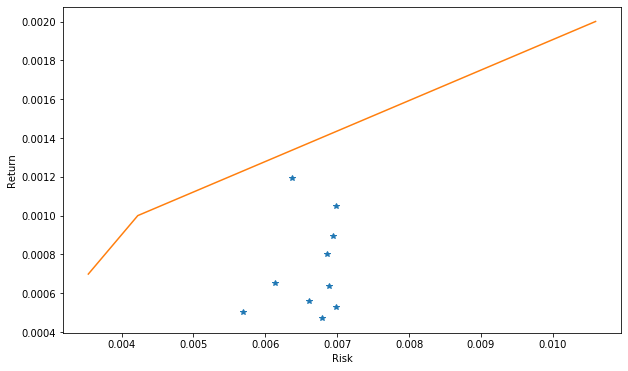

In [190]:
plot_optimal_pack(lambdas2nd[:3],Portfolio, ReallyGoodTickers)

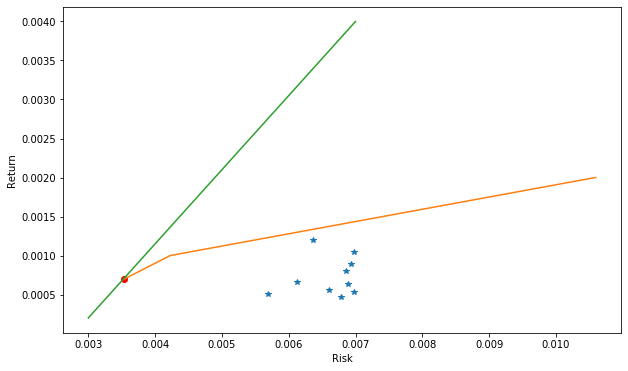

In [194]:
rets=[]
risks=[]
Xes = [X for [Y,X] in lambdas2nd]
Yes = [Y for [Y,X] in lambdas2nd]
for tick in ReallyGoodTickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)


plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes[:3],Yes[:3])
plt.plot([X*0.001 for X in range(3,8)], [X*0.001*0.95 - 0.00265 for X in range(3,8)])
plt.scatter(Xes[0],Yes[0],color='red')
plt.show()

In [231]:
R = [[value_portfolio(X21[0][i],i,j) for i in range(10)] for j in range(1,251)]
Result = []
for row in R:
    Result.append(sum(row))
    
d = {'Diff':Result}
values = pd.DataFrame(d)

values = values.pct_change()
values.sort_values('Diff',inplace=True,ascending=True)
values.quantile(0.05)

Diff   -0.017776
Name: 0.05, dtype: float64

In [232]:
lambdas_long_only2,X22 = get_optimal_pack_long_only2(ReallyGoodTickers)

E0 0.0


     pcost       dcost       gap    pres   dres
 0:  1.3307e-05 -1.0008e+00  1e+00  4e-17  3e+00
 1:  1.3307e-05 -9.9998e-03  1e-02  2e-16  3e-02
 2:  1.3305e-05 -9.1819e-05  1e-04  2e-16  4e-04
 3:  1.3133e-05  8.2311e-06  5e-06  2e-16  2e-05
 4:  1.2565e-05  1.1798e-05  8e-07  1e-16  7e-21
 5:  1.2522e-05  1.2456e-05  7e-08  1e-16  1e-20
Optimal solution found.
0.0007033652222659069 0.003538625858485398
E0 1.6666666666666667e-05


     pcost       dcost       gap    pres   dres
 0:  1.3307e-05 -1.0008e+00  1e+00  8e-17  3e+00
 1:  1.3307e-05 -9.9996e-03  1e-02  1e-16  3e-02
 2:  1.3305e-05 -9.1817e-05  1e-04  4e-17  4e-04
 3:  1.3133e-05  8.2312e-06  5e-06  4e-17  2e-05
 4:  1.2565e-05  1.1798e-05  8e-07  4e-17  9e-21
 5:  1.2522e-05  1.2456e-05  7e-08  8e-17  4e-21
Optimal solution found.
0.0007033657278883699 0.003538625881326112
E0 3.3333333333333335e-05


     pcost       dcost       gap    pres   dres
 0:  1.3307e-05 -1.0008e+00  1e+00  3e-17  3e+00
 1:  1.3307e-05 -9.9

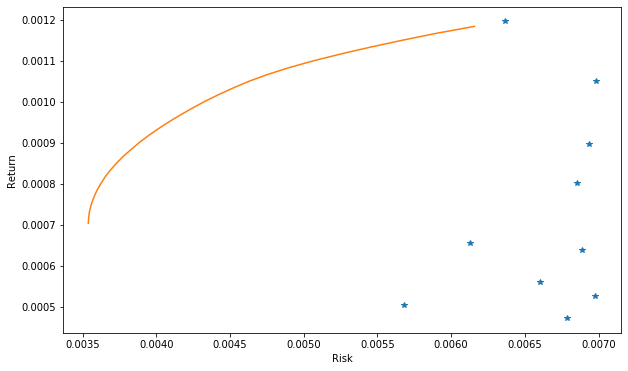

In [233]:
plot_optimal_pack(lambdas_long_only2,Portfolio, ReallyGoodTickers)

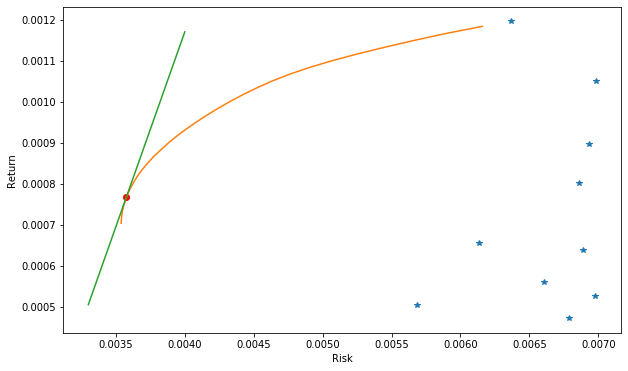

In [280]:
rets=[]
risks=[]
Xes = [X for [Y,X] in lambdas_long_only2]
Yes = [Y for [Y,X] in lambdas_long_only2]
for tick in ReallyGoodTickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)


plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes,Yes)
plt.plot([X*0.0001 for X in range(33,41)], [X*0.0001*0.95 - 0.00263 for X in range(33,41)])
plt.scatter(Xes[46],Yes[46],color='red')
plt.show()

In [279]:
R = [[value_portfolio(X22[42][i],i,j) for i in range(10)] for j in range(1,251)]
Result = []
for row in R:
    Result.append(sum(row))
    
d = {'Diff':Result}
values = pd.DataFrame(d)

values = values.pct_change()
values.sort_values('Diff',inplace=True,ascending=True)
values.quantile(0.05)

Diff   -0.017691
Name: 0.05, dtype: float64

# Task 3

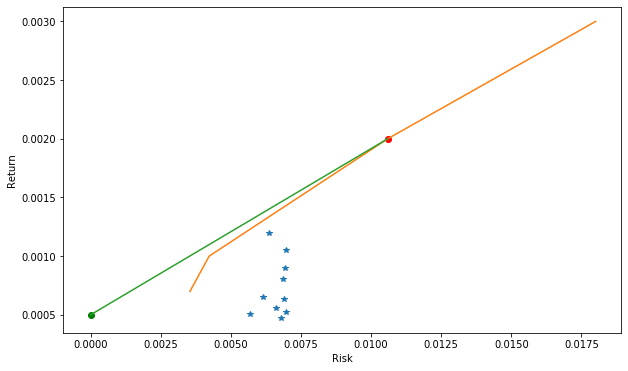

In [252]:
rets=[]
risks=[]
Xes = [X for [Y,X] in lambdas2nd]
Yes = [Y for [Y,X] in lambdas2nd]
for tick in ReallyGoodTickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)


plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes[:4],Yes[:4])
plt.scatter(Xes[2],Yes[2],color='red')
plt.scatter(0,0.0005,color='green')
plt.plot([0,Xes[2]],[0.0005,Yes[2]])
plt.show()

In [254]:
R = [[value_portfolio(X21[2][i],i,j) for i in range(10)] for j in range(1,251)]
Result = []
for row in R:
    Result.append(sum(row))
    
d = {'Diff':Result}
values = pd.DataFrame(d)

values = values.pct_change()
values.sort_values('Diff',inplace=True,ascending=True)
values.quantile(0.05)

Diff   -0.046193
Name: 0.05, dtype: float64

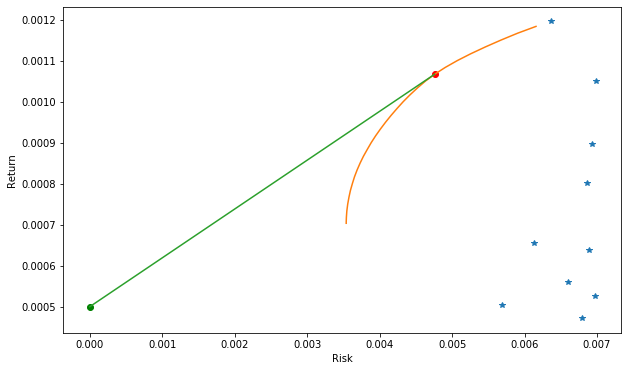

In [264]:
rets=[]
risks=[]
Xes = [X for [Y,X] in lambdas_long_only2]
Yes = [Y for [Y,X] in lambdas_long_only2]
for tick in ReallyGoodTickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)


plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes,Yes)
plt.scatter(Xes[64],Yes[64],color='red')
plt.scatter(0,0.0005,color='green')
plt.plot([0,Xes[64]],[0.0005,Yes[64]])
plt.show()

In [265]:
R = [[value_portfolio(X22[64][i],i,j) for i in range(10)] for j in range(1,251)]
Result = []
for row in R:
    Result.append(sum(row))
    
d = {'Diff':Result}
values = pd.DataFrame(d)

values = values.pct_change()
values.sort_values('Diff',inplace=True,ascending=True)
values.quantile(0.05)

Diff   -0.026
Name: 0.05, dtype: float64